<a href="https://colab.research.google.com/github/vyshu111/House_price_prediction_MachineLearning/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('housing.csv')

In [ ]:
dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
dataset.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=dataset.drop(['median_house_value'],axis=1)
y=dataset['median_house_value']

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
train_dataset=X_train.join(y_train)
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
640,-122.15,37.72,29.0,4169.0,1047.0,2024.0,962.0,2.8125,NEAR BAY,157400.0
3178,-119.79,36.32,19.0,3252.0,614.0,1971.0,607.0,3.0667,INLAND,75800.0
12927,-121.30,38.65,26.0,3192.0,447.0,1132.0,418.0,4.5278,INLAND,144300.0
704,-122.05,37.63,5.0,3785.0,936.0,2240.0,792.0,3.2829,NEAR BAY,162500.0
6801,-118.13,34.09,42.0,700.0,212.0,662.0,210.0,3.0078,<1H OCEAN,191700.0
...,...,...,...,...,...,...,...,...,...,...
10818,-117.91,33.65,19.0,1589.0,421.0,1118.0,394.0,4.1029,<1H OCEAN,213400.0
9146,-118.50,34.45,25.0,1290.0,190.0,689.0,216.0,6.0097,<1H OCEAN,220200.0
8173,-118.11,33.80,36.0,1837.0,319.0,810.0,305.0,4.3897,<1H OCEAN,235000.0
5896,-118.33,34.16,23.0,1359.0,428.0,770.0,380.0,3.4016,<1H OCEAN,234600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

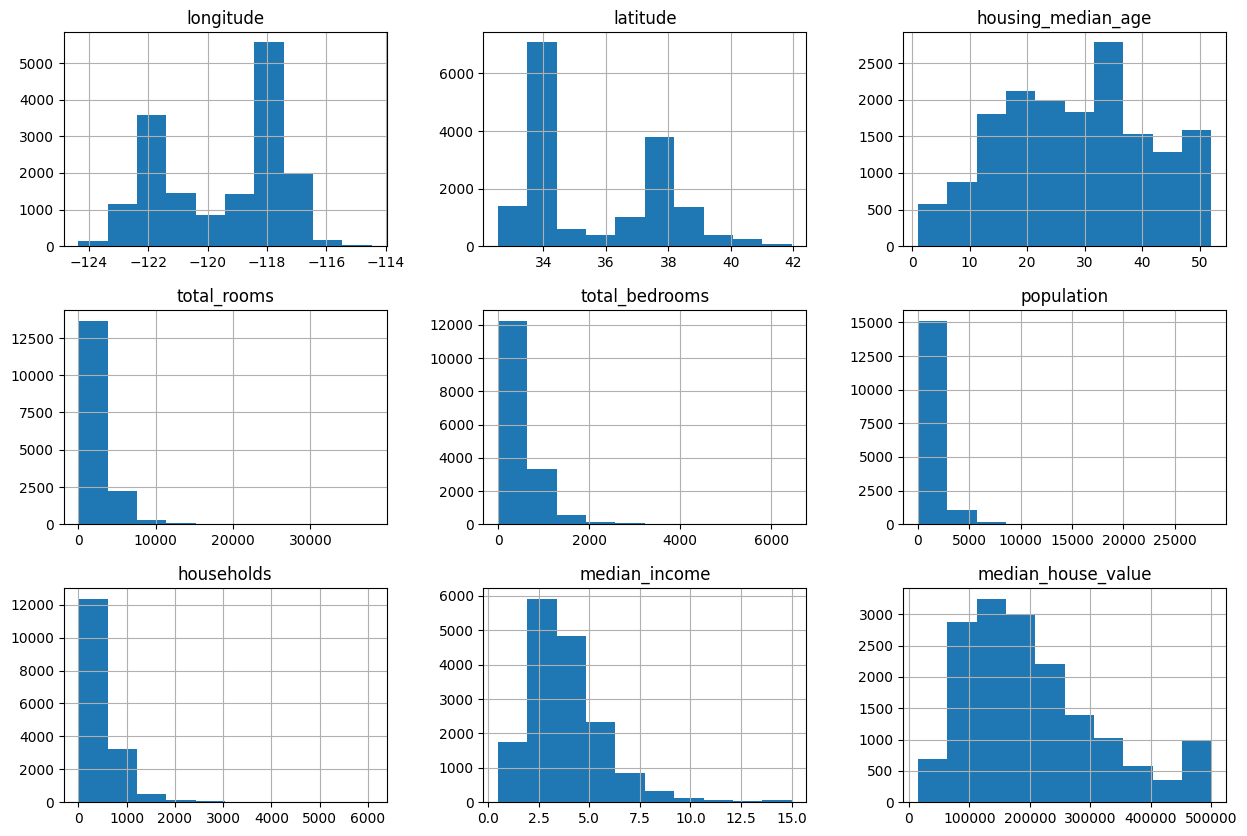

In [ ]:
train_dataset.hist(figsize=(15,10))

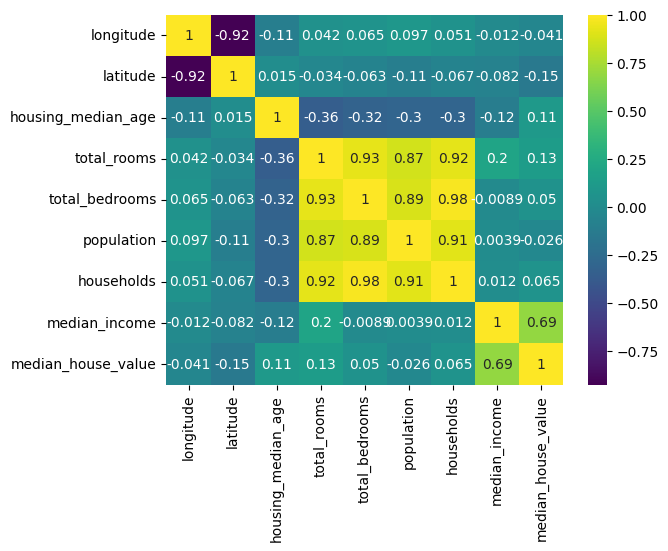

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = train_dataset.select_dtypes(include=['number'])
sns.heatmap(numerical_columns.corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
train_dataset['total_rooms']=np.log(train_dataset['total_rooms']+1)
train_dataset['total_bedrooms']=np.log(train_dataset['total_bedrooms']+1)
train_dataset['population']=np.log(train_dataset['population']+1)
train_dataset['households']=np.log(train_dataset['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

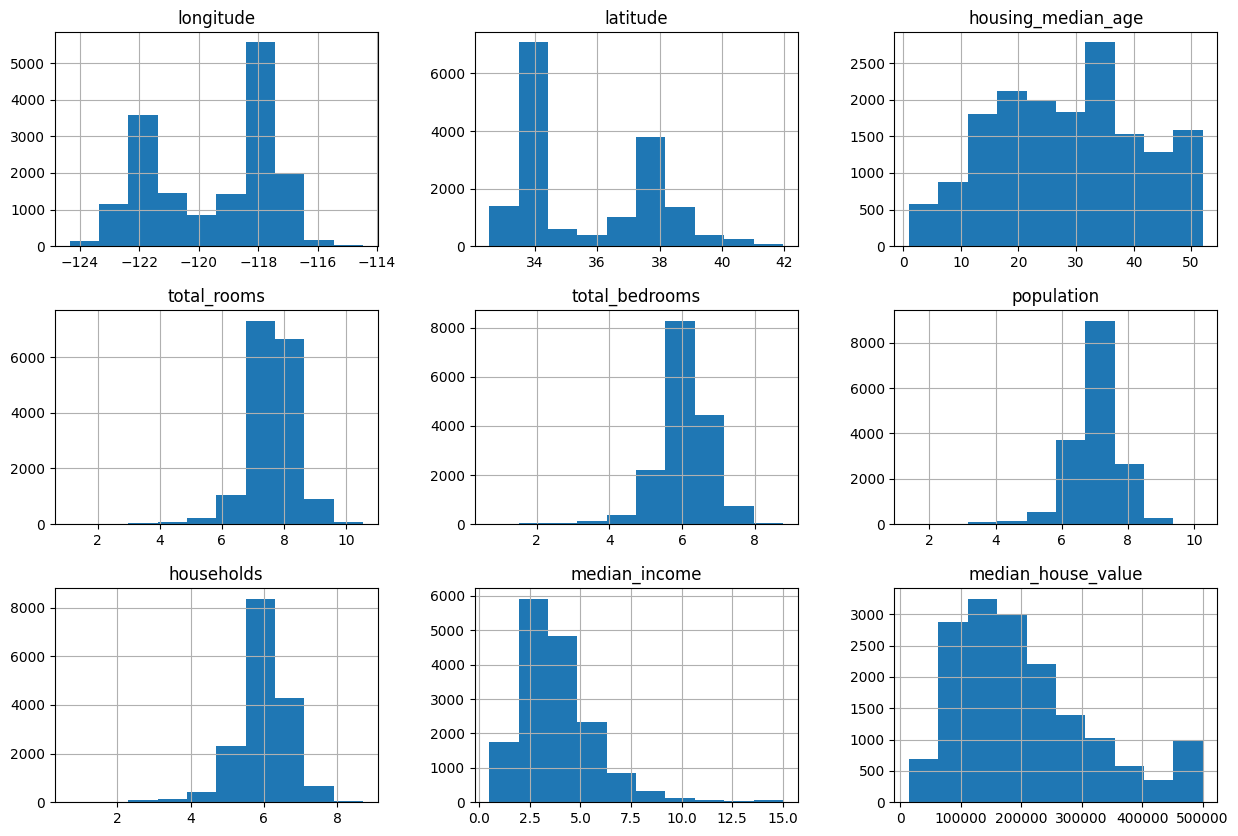

In [ ]:
train_dataset.hist(figsize=(15,10))

In [ ]:
train_dataset.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7191
INLAND        5198
NEAR OCEAN    2106
NEAR BAY      1846
ISLAND           5
Name: count, dtype: int64

In [ ]:
train_dataset=train_dataset.join(pd.get_dummies(train_dataset.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [ ]:
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
640,-122.15,37.72,29.0,8.335671,6.954639,7.613325,6.870053,2.8125,157400.0,False,False,False,True,False
3178,-119.79,36.32,19.0,8.087333,6.421622,7.586804,6.410175,3.0667,75800.0,False,True,False,False,False
12927,-121.30,38.65,26.0,8.068716,6.104793,7.032624,6.037871,4.5278,144300.0,False,True,False,False,False
704,-122.05,37.63,5.0,8.239065,6.842683,7.714677,6.675823,3.2829,162500.0,False,False,False,True,False
6801,-118.13,34.09,42.0,6.552508,5.361292,6.496775,5.351858,3.0078,191700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,-117.91,33.65,19.0,7.371489,6.045005,7.020191,5.978886,4.1029,213400.0,True,False,False,False,False
9146,-118.50,34.45,25.0,7.163172,5.252273,6.536692,5.379897,6.0097,220200.0,True,False,False,False,False
8173,-118.11,33.80,36.0,7.516433,5.768321,6.698268,5.723585,4.3897,235000.0,True,False,False,False,False
5896,-118.33,34.16,23.0,7.215240,6.061457,6.647688,5.942799,3.4016,234600.0,True,False,False,False,False


<Axes: >

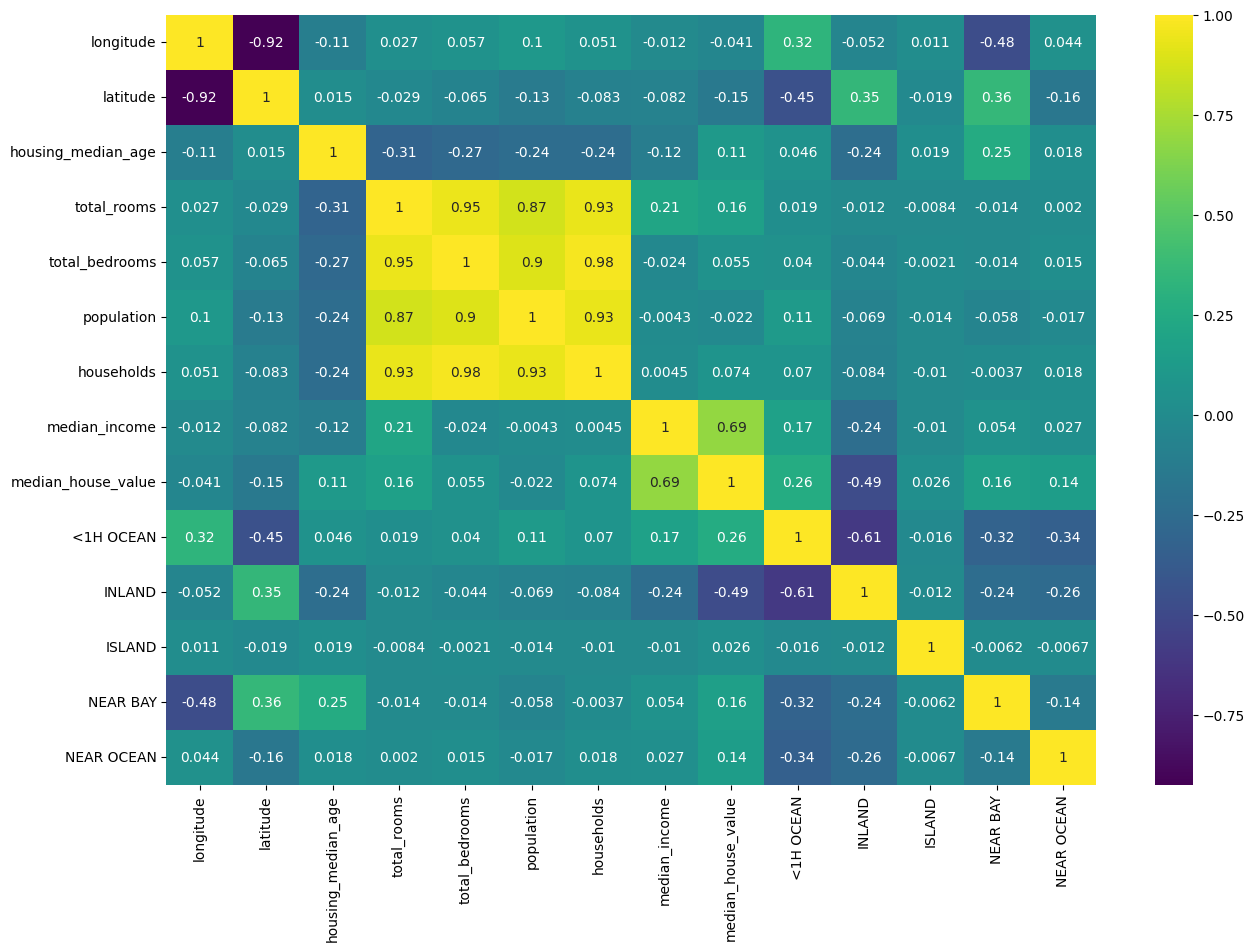

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_dataset.corr(),annot=True,cmap='viridis')

<Axes: xlabel='latitude', ylabel='longitude'>

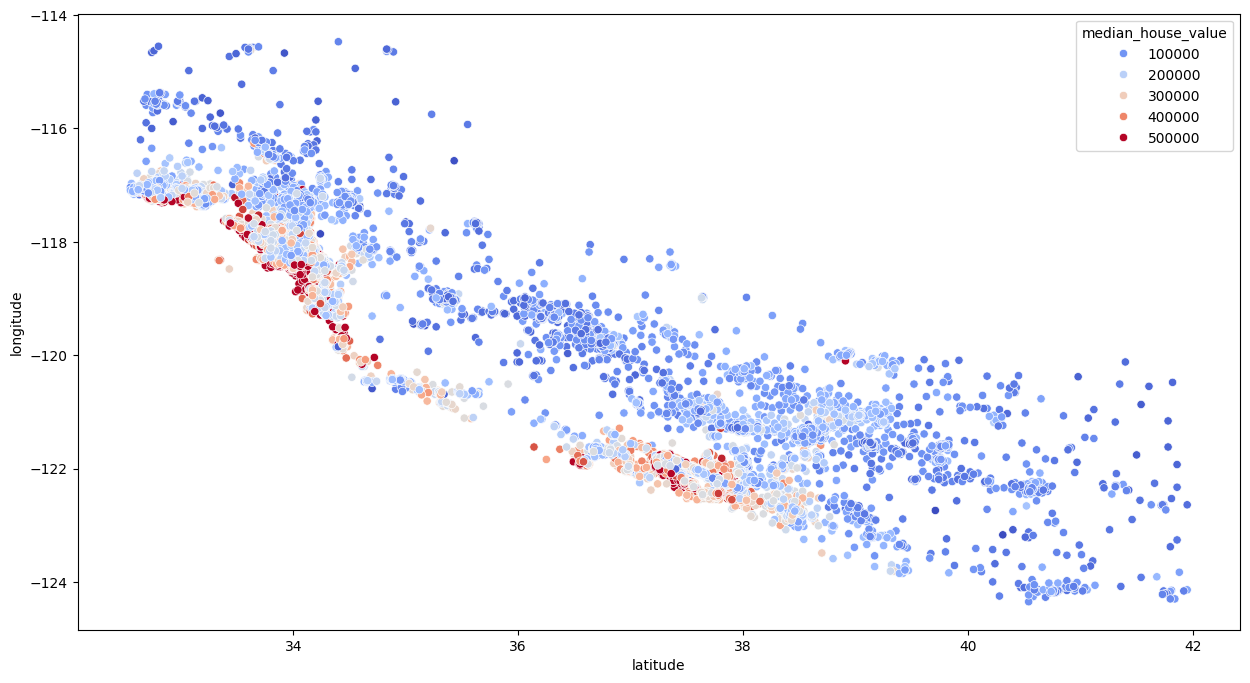

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_dataset,hue='median_house_value',palette='coolwarm') # Changed 'logitude' to 'longitude'

In [ ]:
train_dataset['bedroom_ratio']=train_dataset['total_bedrooms']/train_dataset['total_rooms']
train_dataset['household_rooms']=train_dataset['total_rooms']/train_dataset['households']

<Axes: >

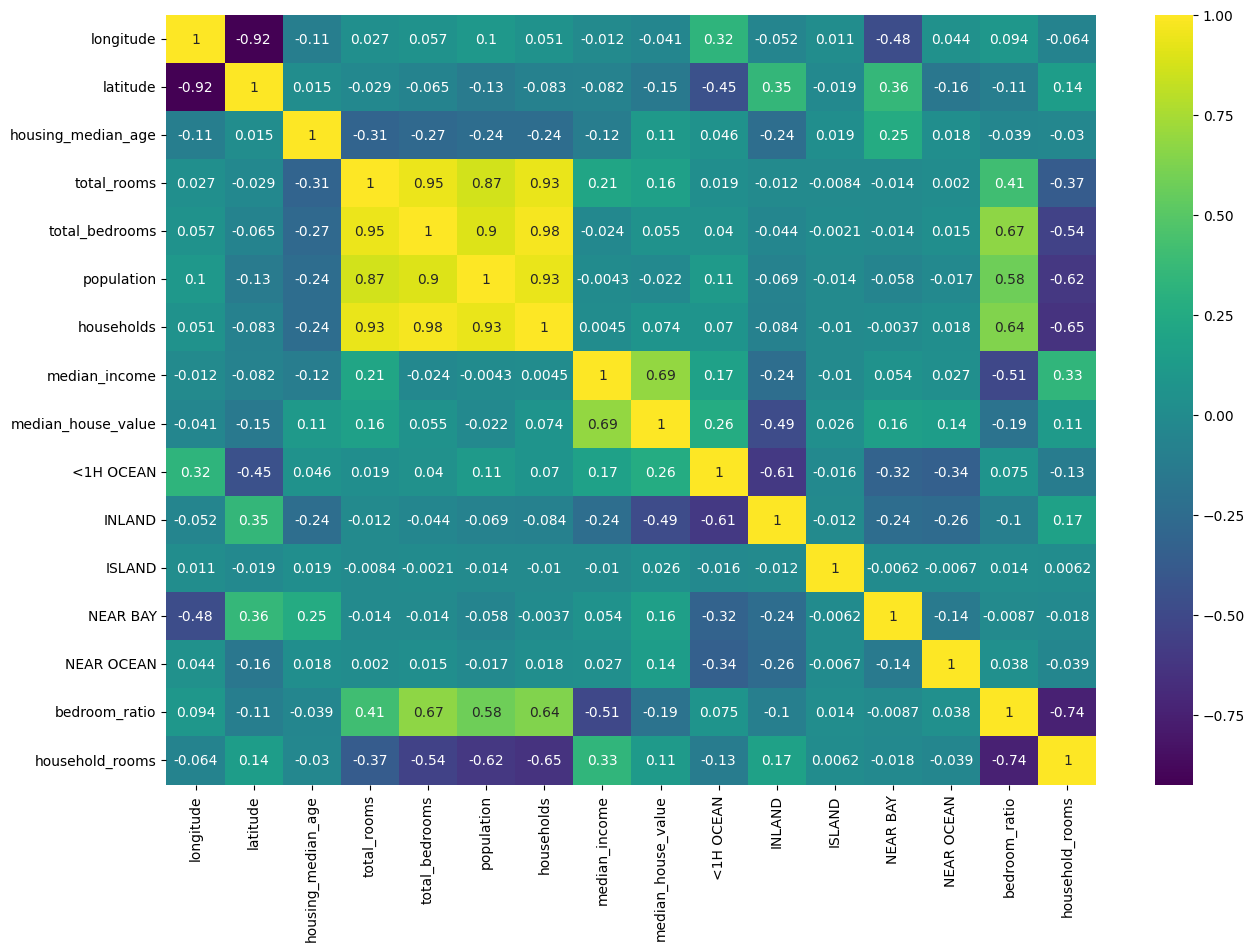

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train_dataset.corr(),annot=True,cmap='viridis')

In [ ]:
from sklearn.linear_model import LinearRegression


X_train,y_train=train_dataset.drop(['median_house_value'],axis=1),train_dataset['median_house_value']


reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [ ]:
# Assuming 'ocean_proximity' is present in X_test
test_dataset = X_test.join(y_test)

test_dataset['total_rooms'] = np.log(test_dataset['total_rooms'] + 1)
test_dataset['total_bedrooms'] = np.log(test_dataset['total_bedrooms'] + 1)
test_dataset['population'] = np.log(test_dataset['population'] + 1)
test_dataset['households'] = np.log(test_dataset['households'] + 1)

# Check if 'ocean_proximity' exists before proceeding
if 'ocean_proximity' in test_dataset.columns:
    test_dataset = test_dataset.join(pd.get_dummies(test_dataset.ocean_proximity)).drop(['ocean_proximity'], axis=1)
else:
    print("Warning: 'ocean_proximity' column not found in test_dataset.")

test_dataset['bedroom_ratio'] = test_dataset['total_bedrooms'] / test_dataset['total_rooms']
test_dataset['household_rooms'] = test_dataset['total_rooms'] / test_dataset['households']


In [ ]:
X_test,y_test=test_dataset.drop(['median_house_value'],axis=1),test_dataset['median_house_value']
reg.score(X_test,y_test)

0.23019661047094653

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.32622149542882517

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[2,4],
    'max_depth':[None,4,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
test_forest=grid_search.best_estimator_

In [ ]:
test_forest.score(X_test,y_test)

0.3628764675921665

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)

0.3628764675921665